<a href="https://colab.research.google.com/github/anumit-web/ML-Analytics-Portfolio-2024/blob/main/3.%20A_B_Testing/A_B_testing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence
# Machine Learning
# Portfolio Project
# #3
# A/B Testing
# Goal analyze the result of AB testing for marketing campaign or website feature.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


# Branding statement

In [206]:
# https://i.ibb.co/zZswY34/Pink-hands-network-2.png

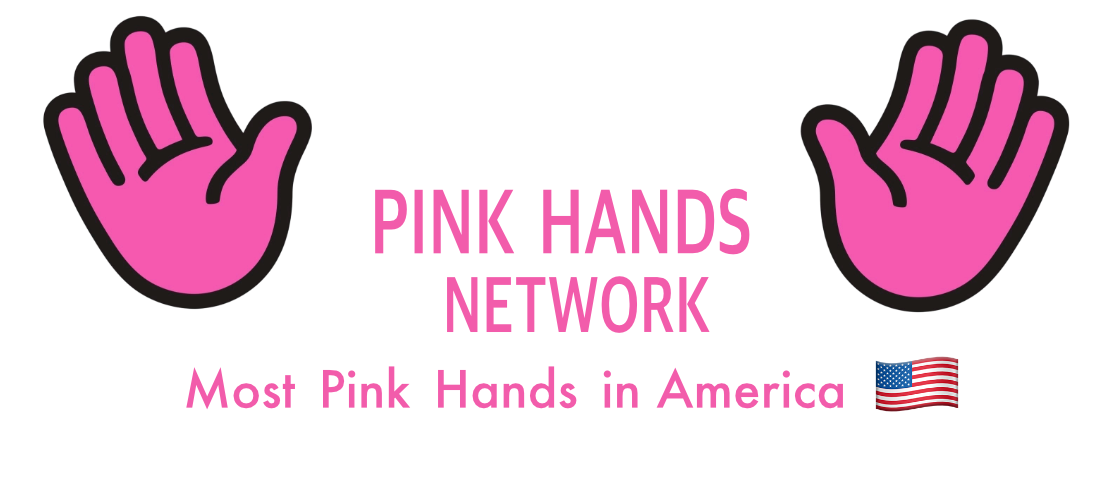

In [207]:
from IPython.display import Image
Image('https://i.ibb.co/zZswY34/Pink-hands-network-2.png')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# EDA, Exploratory Data Analysis

## Control group

Goal analyze the result of AB testing for marketing campaign or website feature.

In [208]:
print('Hello A/B Testing')

Hello A/B Testing


In [209]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
control_group_df = pd.read_csv("https://raw.githubusercontent.com/anumit-web/ML-Analytics-Portfolio-2024/main/3.%20A_B_Testing/dataset/control_group.csv",sep=";")

In [211]:
control_group_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
control_group_df.tail(),

(       Campaign Name        Date  Spend [USD]  # of Impressions     Reach  \
 25  Control Campaign  26.08.2019         2233          124897.0   98432.0   
 26  Control Campaign  27.08.2019         2061          104678.0   91579.0   
 27  Control Campaign  28.08.2019         2421          141654.0  125874.0   
 28  Control Campaign  29.08.2019         2375           92029.0   74192.0   
 29  Control Campaign  30.08.2019         2324          111306.0   88632.0   
 
     # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
 25               5435.0         2847.0             2421.0            1448.0   
 26               4941.0         3549.0             3249.0             980.0   
 27               6287.0         1672.0             1589.0            1711.0   
 28               8127.0         4891.0             4219.0            1486.0   
 29               4658.0         1615.0             1249.0             442.0   
 
     # of Purchase  
 25          251.0  
 26   

In [213]:
control_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [214]:
control_group_df.describe()


,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


print column names

In [215]:
print(control_group_df.columns)

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')


In [216]:
# Get all Column Header Labels as List
for column_headers in control_group_df.columns:
    print(column_headers)

Campaign Name
Date
Spend [USD]
# of Impressions
Reach
# of Website Clicks
# of Searches
# of View Content
# of Add to Cart
# of Purchase


In [217]:
! pip install skimpy

In [218]:
from skimpy import skim

In [219]:
skim(control_group_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 30     │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25   ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Spend [USD]           │   0 │     0 │    2288 │  367.3 │  1757 │  1946 │   2300 │   2532 │   3083 │ ▇▃▅▅▃▂ │  │
│ │ # of Impressions      │   1 │  3.33 │  109600 │  21690 │ 71270 │ 92030 │ 113400 │ 121300 │ 145200 │ ▅▂▃▇▅▃ │  │
│ │ Reach                 │   1 │  3.33 │   88840 │  21830 │ 42860 │ 74190 │  91580 │ 102500 │ 127900 │ ▃▃▃▇▆▃ │  │
│ │ # of Website Clicks   │   1 │  3.33 │    5321 │   1757 │  2277 │  4085 │   5224 │   6628 │   8137 │ ▆▃▇▃▇▆ │  │
│ │ # of Searches         │   1 │  3.33 │    2221 │  866.1 │  1001 │  1615 │   2390 │   2711 │   4891 │ ▆▅▇▂ ▁ │  │
│ │ # of View Content     │   1 │  3.33 │    1944 │  777.5 │   848 │  1249 │   1984 │   2421 │   4219 │ ▆▃▇▁▁▁ │  │
│ │ # of Add to Cart      │   1 │  3.33 │    1300 │  407.5 │   442 │   930 │   1339 │   1641 │   1913 │ ▂▇▅▃▇▇ │  │
│ │ # of Purchase         │   1 │  3.33 │   522.8 │    185 │   222 │   372 │    501 │    670 │    800 │ ▅▇▆▅▃▇ │  │
│ └───────────────────────┴─────┴───────┴─────────┴────────┴───────┴───────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Campaign Name                │      0 │          0 │                           2 │                      60 │  │
│ │ Date                         │      0 │          0 │                           1 │                      30 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [220]:
! pip install summarytools

In [221]:
from summarytools import dfSummary

In [222]:
dfSummary(control_group_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Campaign Name[object],1. Control Campaign,30 (100.0%),,0(0.0%)
2,Date[object],1. 1.08.20192. 2.08.20193. 29.08.20194. 28.08.20195. 27.08.20196. 26.08.20197. 25.08.20198. 24.08.20199. 23.08.201910. 22.08.201911. other,1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)20 (66.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADiUlEQVR4nO3cQWoaYQCG4d8iodkoIniYHKKH7SG8jYizaEI2dlEK0iQ7eR2mz7MqsxrIy8gM/9fV9XodUPj26Bvg/yE2MmIjIzYyYiMjNjJiIyM2MmIjsxpjPI8xnv65/n69Xl8fcD8s2Hq/3//YbDa724vTNJ1Xq9VPwXFP681ms3t5eXndbrdvY4xxuVy+H4/H3el0ehpjiI27WY8xxna7fTscDr9urj8/6H5YMC8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGZj3GnzNsfy/c/hvuaT1N0/l4PO7GzRm2aZrOY4z3x90WS2SDQGblv8yi4slGxrqKjHUVGesqMj7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2Q82cgYvJAxeCFj8ELGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOBZOxuCFjBcEMn5GyVhXkbGuImNdRcYLAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWQcCydjXUXGk42MwQsZgxcyBi9kfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGPhZAxeyHiykTF4IWPwQsbghYyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRkbBDLWVWQ82chYV5GxriJjXUXGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOBZOxuCFjCcbGYMXMgYvZAxeyPioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnHwskYvJDxgkDGzygZ6yoy1lVkrKvIeEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjGPhZKyryHiykTF4IWPwQsbghYyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxLJyMwQuZr55szMOifmE+HbwwD0sbHn0YvDAPSxwefTV4YR4WNTzyUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3Mh8EL87DEv8mngxfmYWnDI8fC521Rx8INXsh4QSAjNjJiIyM2MmIjIzYyYiMjNjJiI/MbyHlO4hUoe7gAAAAASUVORK5CYII="">",0(0.0%)
3,Spend [USD][int64],Mean (sd) : 2288.4 (367.3)min < med < max:1757.0 < 2299.5 < 3083.0IQR (CV) : 586.5 (6.2),30 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoklEQVR4nO3dvW7aUByG8f+BEJkPGSFU2Fg6VurAyEX0YnsJHbgChi6Z2JAQAuEGYQydiFqVBnxOHPslz2/OcRLpUSLLr4w7nU4GVF2t7B8AuMXDtS9wzjXN7NHz+vvT6fTseRZ48Wqozrlmv9//Fsdxz+fim81m5Zz7TqwIde0v6mMcx73JZPLc7XZ3eS68Xq+j6XTaWy6Xj2ZGqAhy9V+/mVm3290NBoNfHtdvepwB/sHNFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiTc9AjVV5ZlDTOLnXO+lyhtfRW4GquZ2dHzLIuzCwoLNUmSRpqmX0ejUb1er+catJyVtb4KWY1lWdZIkuRzp9N5qtVqad7zLM4uKyzU/X7/EEVRazwe74bD4Srv+ZLXV96rsfl83pvNZp/G4/HPvL83i7P/K/Rfv5lZu932XV6Zlby+8lmNrVarplnQ783i7AJupiCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGh8CdTIQJHLSHDkPh4PDY8z5bqXl/BVNlQQ0YtocOQNE2jLMu+7Ha7H2bm+/j33d3zK5gqG2rIqCVkGPLH+dbhcKjnPVuyu30FU2VDPfMZd4QOQ87nVd3jK5i4mYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWEyj+Z+mgChziyY5prCLVCQt8uozqmuQWhVkjo22WExzRXEWoFfdQxzWu4mYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEHqHixRt8Llhhn69FqDCz8OVW0Z+vRagwszdbbhX2+VqEir+ELreK+nwtbqYggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAh4aYnU+v1Osp74e12G5mZJUkSLRaL1nueV/3eqj936Plb+voNay+XuHWyyYUAAAAASUVORK5CYII="">",0(0.0%)
4,# of Impressions[float64],Mean (sd) : 109559.8 (21688.9)min < med < max:71274.0 < 113430.0 < 145248.0IQR (CV) : 29303.0 (5.1),29 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACnElEQVR4nO3dzYraUBiH8XP8In4QEanu3HRZ6MKlF9GL7SV04RW46KYrd4JIxHSCMUk3LbQwnTE5Oeo/Pr91j2TOPBTiy8vYoigM8Oha934A4Bqdez8A/mWt7Rtjeg4fcS6K4qWu53kUhPpArLX96XT6JQzDSdXPOB6PB2vt16bFSqiPpReG4WS1Wr2Mx+Ok7OEoioL1ej3Z7/c9Ywyhwq/xeJzMZrOfFY/3a32YB8HLFCQQKiQQKiQQKiQQKiQQKiQQKiTwPaoHDmPQMM/zbt3P0wSEWjOXMWiapkGWZZ+SJPlmjKn6hX8jEWr9Ko9Bt9vtZLPZDC6XS9vXw6kiVE+qjEEPh0Mjx5914GUKEggVEggVEggVEggVEggVEggVEggVEt79wt9xfbeRq7u4vTdDdV3fberqLm7vvf9RK8+tm7y6i9u7atbvsL7L7Bq14GUKEggVEggVEggVEggVEggVEggVEtiZ+g9WnsvzOW4n1Few8lye73E7ob6OlefyvI7bCfUNrDyX52vczssUJBAqJBAqJBAqJBA

## Test group

https://raw.githubusercontent.com/anumit-web/ML-Analytics-Portfolio-2024/main/3.%20A_B_Testing/dataset/test_group.csv

In [223]:
test_group_df = pd.read_csv("https://raw.githubusercontent.com/anumit-web/ML-Analytics-Portfolio-2024/main/3.%20A_B_Testing/dataset/test_group.csv",sep=";")


In [224]:
test_group_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [225]:
test_group_df.tail()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
25,Test Campaign,26.08.2019,2311,80841,61589,3820,2037,1046,346,284
26,Test Campaign,27.08.2019,2915,111469,92159,6435,2976,2552,992,771
27,Test Campaign,28.08.2019,2247,54627,41267,8144,2432,1281,1009,721
28,Test Campaign,29.08.2019,2805,67444,43219,7651,1920,1240,1168,677
29,Test Campaign,30.08.2019,1977,120203,89380,4399,2978,1625,1034,572


In [226]:
test_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [227]:
test_group_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [228]:
for column_headers in test_group_df.columns:
    print(column_headers)

Campaign Name
Date
Spend [USD]
# of Impressions
Reach
# of Website Clicks
# of Searches
# of View Content
# of Add to Cart
# of Purchase


In [229]:
skim(test_group_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 30     │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Spend [USD]            │   0 │     0 │   2563 │  348.7 │   1968 │   2324 │  2584 │  2836 │   3112 │ ▆▃▇▆▇▅ │  │
│ │ # of Impressions       │   0 │     0 │  74580 │  32120 │  22520 │  47540 │ 68850 │ 99500 │ 133800 │ ▇▇▅▇▅▅ │  │
│ │ Reach                  │   0 │     0 │  53490 │  28800 │  10600 │  31520 │ 44220 │ 78780 │ 109800 │ ▃▇▃▂▅▂ │  │
│ │ # of Website Clicks    │   0 │     0 │   6032 │   1709 │   3038 │   4407 │  6242 │  7605 │   8264 │ ▃▅▂▂▃▇ │  │
│ │ # of Searches          │   0 │     0 │   2419 │  388.7 │   1854 │   2043 │  2396 │  2801 │   2978 │ ▇▅▂▃▃▇ │  │
│ │ # of View Content      │   0 │     0 │   1858 │  597.7 │    858 │   1320 │  1881 │  2412 │   2801 │ ▇▃▆▆▅▇ │  │
│ │ # of Add to Cart       │   0 │     0 │  881.5 │  347.6 │    278 │  582.5 │   974 │  1148 │   1391 │ ▇▂▂▇▇▇ │  │
│ │ # of Purchase          │   0 │     0 │  521.2 │    211 │    238 │    298 │   500 │   701 │    890 │ ▇▂▃▃▆▂ │  │
│ └────────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴───────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Campaign Name                │      0 │          0 │                           2 │                      60 │  │
│ │ Date                         │      0 │          0 │                           1 │                      30 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [230]:
dfSummary(test_group_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Campaign Name[object],1. Test Campaign,30 (100.0%),,0(0.0%)
2,Date[object],1. 1.08.20192. 2.08.20193. 29.08.20194. 28.08.20195. 27.08.20196. 26.08.20197. 25.08.20198. 24.08.20199. 23.08.201910. 22.08.201911. other,1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)1 (3.3%)20 (66.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADiUlEQVR4nO3cQWoaYQCG4d8iodkoIniYHKKH7SG8jYizaEI2dlEK0iQ7eR2mz7MqsxrIy8gM/9fV9XodUPj26Bvg/yE2MmIjIzYyYiMjNjJiIyM2MmIjsxpjPI8xnv65/n69Xl8fcD8s2Hq/3//YbDa724vTNJ1Xq9VPwXFP681ms3t5eXndbrdvY4xxuVy+H4/H3el0ehpjiI27WY8xxna7fTscDr9urj8/6H5YMC8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGZj3GnzNsfy/c/hvuaT1N0/l4PO7GzRm2aZrOY4z3x90WS2SDQGblv8yi4slGxrqKjHUVGesqMj7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2Q82cgYvJAxeCFj8ELGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOBZOxuCFjBcEMn5GyVhXkbGuImNdRcYLAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWQcCydjXUXGk42MwQsZgxcyBi9kfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGPhZAxeyHiykTF4IWPwQsbghYyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRkbBDLWVWQ82chYV5GxriJjXUXGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOBZOxuCFjCcbGYMXMgYvZAxeyPioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnHwskYvJDxgkDGzygZ6yoy1lVkrKvIeEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjGPhZKyryHiykTF4IWPwQsbghYyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxLJyMwQuZr55szMOifmE+HbwwD0sbHn0YvDAPSxwefTV4YR4WNTzyUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3Mh8EL87DEv8mngxfmYWnDI8fC521Rx8INXsh4QSAjNjJiIyM2MmIjIzYyYiMjNjJiI/MbyHlO4hUoe7gAAAAASUVORK5CYII="">",0(0.0%)
3,Spend [USD][int64],Mean (sd) : 2563.1 (348.7)min < med < max:1968.0 < 2584.0 < 3112.0IQR (CV) : 511.8 (7.4),30 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACfUlEQVR4nO3cu47aQBiG4X84rMxBthAKdDQpI6VwyUXkYnMJKbgCijSp6JAQMsJZCzOQbptIC3jWsT/yPjXjsbWvFln+sbterwa0XafpEwDu0bv1AefcwMxeKh7/dL1eXyuuBd68G6pzbjCdTr/FcTypcvDD4bB3zn0nVoS69R/1JY7jyXK5fE2SpHjkwFmWRavVarLb7V7MjFAR5OZXv5lZkiTFbDb7XeH4gwprgL9wMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJdz1ChY7AabeOmV0Ctq9tWo5Qn0jItJv3vp/n+efxePyr0+mUVfavc1qOUJ9L5Wm3zWYzWa/Xn9I0/Tmfz/ePblz3tByhPqEq0277/X5gZjYajapOypnVOC3HzRQkECokECokECokECokECokECokECokECoktPrJVMMDFiHrQ9bKvgbJe983s9g5V2X5u9fd2lCbHLAIWR+6t+prkPI875dl+XWxWHS73e5DcwZmt6+7taFagwMWIetD1iq/Bul0OvWiKBqmaVrUcd1tDtXMmhmwCFn/AcMd0q9Bquu6uZmCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFhNY/mfrfBA52xJfLpf/Bp9QKhNoioYMdZVlG3vsvRVH8MLOqv81vJUJtkZDBDrO3gZjh+Xzu1nF+TSLUFgodpnlG3ExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCwl2/68+yLHr0wFmWRd77noW9nqZXZe/j8RiZmeV5Hm232+G/XN/UWuW97/kb/wFaBVQGn12gOgAAAABJRU5ErkJggg=="">",0(0.0%)
4,# of Impressions[int64],Mean (sd) : 74584.8 (32121.4)min < med < max:22521.0 < 68853.5 < 133771.0IQR (CV) : 51958.8 (2.3),30 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACn0lEQVR4nO3csW7aUBSH8XMhIAOREUKFjaVjpQ6MPEQfto/QIU/A0KUTGxJCINwgjKFLskUJ+HBT/8332699h08g++g6nM9nA6qu8b83AFziIebFQwgdM2s7LnE4n8/Pt9oPdEULNYTQGQ6HP9I0HZS9xna7XYcQfhIrYv6ittM0Hcxms+d+v7+/dvFms0menp4Gq9WqbWaEeuei/vWbmfX7/f1oNPpbcnnnppuBLB6mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQISH6mSmPoihaZpaGEMos56h1jVQ21CzLWnmef59MJs1ms3n1KVaOWtdLZUM9HA4PSZJ0p9Ppfjwer69Zy1Hr+qlsqK96vV7Z49Ycta4RHqYggVAhgVAhgVAhgVAhgVAhgVAhofLvUctyjl/NHCNY55e2G2Z2KrnWu95772hj61qG6h2/mpUfwXq+tF0URSvLsq+Pj49/Go1G/pnrvfc2izu2rmWonvGrmXsEW/pL24vFYjCfz79Mp9PfZfbtWe+9d+yxdS1DfeUYv5o5R7BlvrS9Xq87ZuX37Vnvvf

# Data Processing

## Change column names

In [231]:
column_names = ['Campaign Name', 'Date', 'Amount Spent', 'Impressions',
                'Unique Impressions', 'Clicks', 'Number of Searches',
                'Page Views', 'Add to Carts', 'Purchases']

In [232]:
control_group_df.columns = column_names

control_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Campaign Name       30 non-null     object 
 1   Date                30 non-null     object 
 2   Amount Spent        30 non-null     int64  
 3   Impressions         29 non-null     float64
 4   Unique Impressions  29 non-null     float64
 5   Clicks              29 non-null     float64
 6   Number of Searches  29 non-null     float64
 7   Page Views          29 non-null     float64
 8   Add to Carts        29 non-null     float64
 9   Purchases           29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [233]:
control_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Campaign Name       30 non-null     object 
 1   Date                30 non-null     object 
 2   Amount Spent        30 non-null     int64  
 3   Impressions         29 non-null     float64
 4   Unique Impressions  29 non-null     float64
 5   Clicks              29 non-null     float64
 6   Number of Searches  29 non-null     float64
 7   Page Views          29 non-null     float64
 8   Add to Carts        29 non-null     float64
 9   Purchases           29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [234]:
test_group_df.columns = column_names

test_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Campaign Name       30 non-null     object
 1   Date                30 non-null     object
 2   Amount Spent        30 non-null     int64 
 3   Impressions         30 non-null     int64 
 4   Unique Impressions  30 non-null     int64 
 5   Clicks              30 non-null     int64 
 6   Number of Searches  30 non-null     int64 
 7   Page Views          30 non-null     int64 
 8   Add to Carts        30 non-null     int64 
 9   Purchases           30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [235]:
test_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Campaign Name       30 non-null     object
 1   Date                30 non-null     object
 2   Amount Spent        30 non-null     int64 
 3   Impressions         30 non-null     int64 
 4   Unique Impressions  30 non-null     int64 
 5   Clicks              30 non-null     int64 
 6   Number of Searches  30 non-null     int64 
 7   Page Views          30 non-null     int64 
 8   Add to Carts        30 non-null     int64 
 9   Purchases           30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


## fill mean average values in rows and columns

In [236]:
control_group_df.isnull().sum()

,0
Campaign Name,0
Date,0
Amount Spent,0
Impressions,1
Unique Impressions,1
Clicks,1
Number of Searches,1
Page Views,1
Add to Carts,1
Purchases,1


In [237]:
# Find rows with null values

null_rows = control_group_df[control_group_df.isnull().any(axis=1)]

row_count = len(null_rows)
print("Number of rows with null values =", row_count)

print("- - - - - - - - - ")

print(null_rows)

Number of rows with null values = 1
- - - - - - - - - 
      Campaign Name       Date  Amount Spent  Impressions  Unique Impressions  \
4  Control Campaign  5.08.2019          1835          NaN                 NaN   

   Clicks  Number of Searches  Page Views  Add to Carts  Purchases  
4     NaN                 NaN         NaN           NaN        NaN  


In [238]:
cols = control_group_df.select_dtypes([np.number]).columns

mean_values = control_group_df[cols].mean()

control_group_df[cols] = control_group_df[cols].fillna(mean_values)

In [239]:
from IPython.display import display, HTML

display(HTML(control_group_df.to_html()))

,Campaign Name,Date,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103
5,Control Campaign,6.08.2019,3083,109076.000000,87998.000000,4028.000000,1709.000000,1249.000000,784.0,764.000000
6,Control Campaign,7.08.2019,2544,142123.000000,127852.000000,2640.000000,1388.000000,1106.000000,1166.0,499.000000
7,Control Campaign,8.08.2019,1900,90939.000000,65217.000000,7260.000000,3047.000000,2746.000000,930.0,462.000000
8,Control Campaign,9.08.2019,2813,121332.000000,94896.000000,6198.000000,2487.000000,2179.000000,645.0,501.000000
9,Control Campaign,10.08.2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000


## Change column names

In [240]:
column_names = ['Campaign Name', 'Date', 'Amount Spent', 'Impressions',
                'Unique Impressions', 'Clicks', 'Number of Searches',
                'Page Views', 'Add to Carts', 'Purchases']

In [241]:
test_group_df.columns = column_names

test_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Campaign Name       30 non-null     object
 1   Date                30 non-null     object
 2   Amount Spent        30 non-null     int64 
 3   Impressions         30 non-null     int64 
 4   Unique Impressions  30 non-null     int64 
 5   Clicks              30 non-null     int64 
 6   Number of Searches  30 non-null     int64 
 7   Page Views          30 non-null     int64 
 8   Add to Carts        30 non-null     int64 
 9   Purchases           30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


## fill mean average values in rows and columns

In [242]:
test_group_df.isnull().sum()


,0
Campaign Name,0
Date,0
Amount Spent,0
Impressions,0
Unique Impressions,0
Clicks,0
Number of Searches,0
Page Views,0
Add to Carts,0
Purchases,0


In [243]:
# no action needed as no values are null

## Process combined data from control group and test group

In [244]:
# Concat the two dataframes
ab_data = pd.concat([control_group_df, test_group_df])

ab_data.head()

,Campaign Name,Date,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103


In [245]:
# Concat the two dataframes
combined_data_df = pd.concat([control_group_df, test_group_df])

combined_data_df = combined_data_df.reset_index()

combined_data_df.head()

combined_data_df.tail()

,index,Campaign Name,Date,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases
55,25,Test Campaign,26.08.2019,2311,80841.0,61589.0,3820.0,2037.0,1046.0,346.0,284.0
56,26,Test Campaign,27.08.2019,2915,111469.0,92159.0,6435.0,2976.0,2552.0,992.0,771.0
57,27,Test Campaign,28.08.2019,2247,54627.0,41267.0,8144.0,2432.0,1281.0,1009.0,721.0
58,28,Test Campaign,29.08.2019,2805,67444.0,43219.0,7651.0,1920.0,1240.0,1168.0,677.0
59,29,Test Campaign,30.08.2019,1977,120203.0,89380.0,4399.0,2978.0,1625.0,1034.0,572.0


In [246]:
combined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               60 non-null     int64  
 1   Campaign Name       60 non-null     object 
 2   Date                60 non-null     object 
 3   Amount Spent        60 non-null     int64  
 4   Impressions         60 non-null     float64
 5   Unique Impressions  60 non-null     float64
 6   Clicks              60 non-null     float64
 7   Number of Searches  60 non-null     float64
 8   Page Views          60 non-null     float64
 9   Add to Carts        60 non-null     float64
 10  Purchases           60 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 5.3+ KB


In [247]:
combined_data_df.describe()

,index,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,14.500000,2425.750000,92072.279310,71168.248851,5676.563218,2320.138506,1900.896552,1090.766667,522.013218
std,8.728484,381.130461,32270.541283,30847.039691,1740.469866,663.473391,681.437956,427.427479,195.297540
min,0.000000,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,7.000000,2073.750000,69558.250000,43235.500000,4230.750000,1970.750000,1249.000000,863.250000,340.000000
50%,14.500000,2420.500000,98281.000000,77422.000000,5581.000000,2374.500000,1959.396552,1082.500000,506.000000
75%,22.000000,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.000000
max,29.000000,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


# Data Calculations - CTR & CR

add new columns
normalized = value between 0 and 1
percent = value between 0 and 100

In [248]:
combined_data_df['CTR_Normalized'] = 0
combined_data_df['CTR_Percent'] = 0
combined_data_df['CR_Normalized'] = 0
combined_data_df['CR_Percent'] = 0

#print
combined_data_df.head()

,index,Campaign Name,Date,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases,CTR_Normalized,CTR_Percent,CR_Normalized,CR_Percent
0,0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000,0,0,0,0
1,1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000,0,0,0,0
2,2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000,0,0,0,0
3,3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000,0,0,0,0
4,4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103,0,0,0,0


In [249]:
combined_data_df['CTR_Normalized'] = (combined_data_df['Clicks'] /
                      combined_data_df['Impressions'])

combined_data_df['CTR_Percent'] = (combined_data_df['Clicks'] /
                      combined_data_df['Impressions']) * 100

# print
combined_data_df.head()

,index,Campaign Name,Date,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases,CTR_Normalized,CTR_Percent,CR_Normalized,CR_Percent
0,0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000,0.084835,8.483471,0,0
1,1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000,0.067003,6.700264,0,0
2,2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000,0.049411,4.941121,0,0
3,3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000,0.042057,4.205659,0,0
4,4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103,0.048565,4.856521,0,0


In [250]:
combined_data_df['CR_Normalized'] = (combined_data_df['Clicks'] /
                      combined_data_df['Impressions'])

combined_data_df['CR_Percent'] = (combined_data_df['Clicks'] /
                      combined_data_df['Impressions']) * 100


#print
combined_data_df.head()

,index,Campaign Name,Date,Amount Spent,Impressions,Unique Impressions,Clicks,Number of Searches,Page Views,Add to Carts,Purchases,CTR_Normalized,CTR_Percent,CR_Normalized,CR_Percent
0,0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000,0.084835,8.483471,0.084835,8.483471
1,1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000,0.067003,6.700264,0.067003,6.700264
2,2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000,0.049411,4.941121,0.049411,4.941121
3,3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000,0.042057,4.205659,0.042057,4.205659
4,4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103,0.048565,4.856521,0.048565,4.856521


In [251]:
combined_data_df['CR'] = (combined_data_df['Clicks'] /
                      combined_data_df['Impressions']) * 100

CTR (Click-Through Rate)

CTR = (Number of Clicks / Number of Impressions) x 100

Conversion Rate

Conversion Rate = (Number of Conversions / Number of Visitors) x 100

In [252]:
# Define column names
column_names = ['CTR', 'CR']

# Create an empty DataFrame with column names
calculations_df = pd.DataFrame(columns=column_names)

print(calculations_df)

Empty DataFrame
Columns: [CTR, CR]
Index: []


In [253]:
#CTR

temp_df1 = combined_data_df.groupby('Campaign Name')['Clicks'].sum()

print(temp_df1)

Campaign Name
Control Campaign    159623.793103
Test Campaign       180970.000000
Name: Clicks, dtype: float64


In [254]:
# CR

temp_df2 = combined_data_df.groupby('Campaign Name')['Purchases'].sum()

print(temp_df2)

Campaign Name
Control Campaign    15683.793103
Test Campaign       15637.000000
Name: Purchases, dtype: float64


In [255]:
#total impressions
temp_df3 = combined_data_df.groupby('Campaign Name')['Impressions'].sum()

print(temp_df3)

Campaign Name
Control Campaign    3.286793e+06
Test Campaign       2.237544e+06
Name: Impressions, dtype: float64


In [256]:
temp_df4 = pd.merge(temp_df1, temp_df2, on='Campaign Name')

print(temp_df4)

                         Clicks     Purchases
Campaign Name                                
Control Campaign  159623.793103  15683.793103
Test Campaign     180970.000000  15637.000000


In [257]:
temp_df5 = pd.merge(temp_df4, temp_df3, on='Campaign Name')

print(temp_df5)

                         Clicks     Purchases   Impressions
Campaign Name                                              
Control Campaign  159623.793103  15683.793103  3.286793e+06
Test Campaign     180970.000000  15637.000000  2.237544e+06


In [258]:
temp_df5['CTR']= temp_df5['Clicks'] / temp_df5['Impressions']

# print dataframe
temp_df5

,Clicks,Purchases,Impressions,CTR
Campaign Name,,,,
Control Campaign,159623.793103,15683.793103,3.286793e+06,0.048565
Test Campaign,180970.000000,15637.000000,2.237544e+06,0.080879


In [259]:
temp_df5['CR']= temp_df5['Purchases'] / temp_df5['Clicks']

# print dataframe
temp_df5

,Clicks,Purchases,Impressions,CTR,CR
Campaign Name,,,,,
Control Campaign,159623.793103,15683.793103,3.286793e+06,0.048565,0.098255
Test Campaign,180970.000000,15637.000000,2.237544e+06,0.080879,0.086407


In [260]:
temp_df5['CTR'] = temp_df5['CTR'] * 100
temp_df5['CR'] = temp_df5['CR'] * 100

temp_df5

,Clicks,Purchases,Impressions,CTR,CR
Campaign Name,,,,,
Control Campaign,159623.793103,15683.793103,3.286793e+06,4.856521,9.825473
Test Campaign,180970.000000,15637.000000,2.237544e+06,8.087886,8.640659


In [261]:
calculations_df = temp_df5

calculations_df

,Clicks,Purchases,Impressions,CTR,CR
Campaign Name,,,,,
Control Campaign,159623.793103,15683.793103,3.286793e+06,4.856521,9.825473
Test Campaign,180970.000000,15637.000000,2.237544e+06,8.087886,8.640659


In [262]:
calculations_df = calculations_df.drop(['Clicks', 'Purchases', 'Impressions'], axis=1)

# print
calculations_df



,CTR,CR
Campaign Name,,
Control Campaign,4.856521,9.825473
Test Campaign,8.087886,8.640659


In [263]:
calculations_df['CTR_normalalized'] = calculations_df['CTR'] / 100

calculations_df['CR_normalalized'] = calculations_df['CR'] / 100

# print
calculations_df

,CTR,CR,CTR_normalalized,CR_normalalized
Campaign Name,,,,
Control Campaign,4.856521,9.825473,0.048565,0.098255
Test Campaign,8.087886,8.640659,0.080879,0.086407


# Visualization

## CTR , Click through rate

### Bar chart of CTR

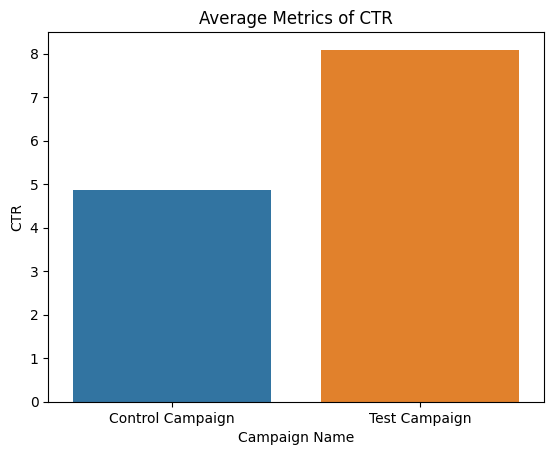

In [264]:
sns.barplot(data=calculations_df, x='Campaign Name',
                    y='CTR', hue='Campaign Name', dodge=False)
plt.title('Average Metrics of CTR')
plt.show()

### Box chart of CTR

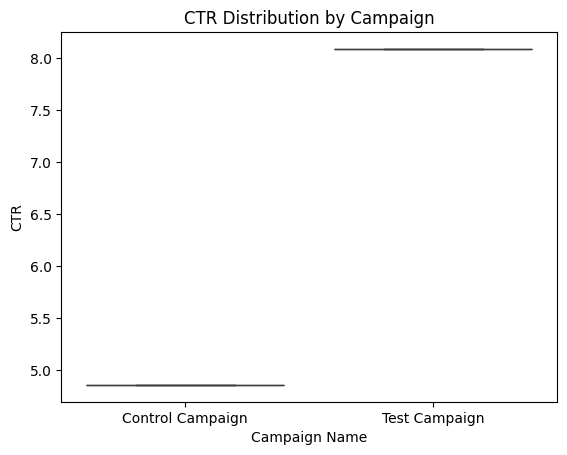

In [265]:
sns.boxplot(x='Campaign Name', y='CTR', data=calculations_df,
            hue='Campaign Name', dodge=False)
plt.title('CTR Distribution by Campaign')
plt.show()